<a href="https://colab.research.google.com/github/RInterested/ALL_ABOUT_GITHUB/blob/master/Fourier_series_manual_calculation_non_periodic_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[1] 6284

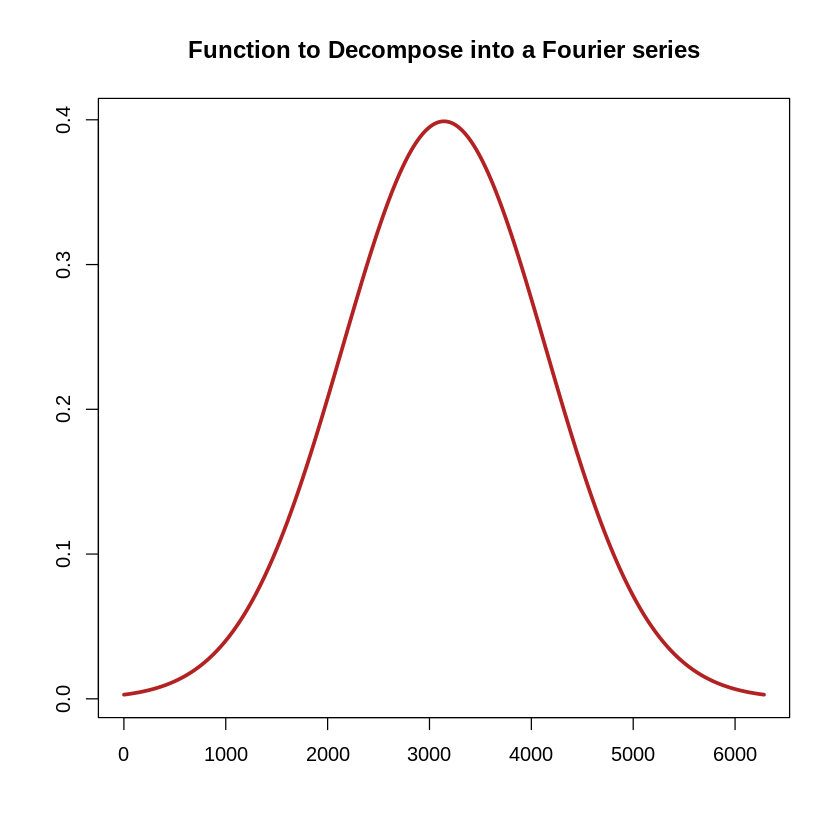

In [3]:
# Manual Fourier series and Inverse Fourier;
dx <- 0.001
lim <- pi
x <- seq(-1*lim,1*lim,dx)
length(x)
P <- max(x) - min(x)
func <- dnorm(x)
#func <- x^2 - 1/2 * x
#func <- 2*tanh(x) - 1/4 * x
#func <- 1/2 * x^2 + 2*sin(x)
plot(func,type='l', col='firebrick', lwd=3, xlab='', ylab='' , main='Function to Decompose into a Fourier series')

From [the Wikipedia entry on Fourier series](https://en.wikipedia.org/wiki/Fourier_series#Definition):

Consider a real-valued function, $ s(x),$ that is integrable on an interval of length $P,$ which will be the period of the Fourier series.

Integer $n,$ used as an index, is also the number of cycles of the $n$-th harmonic in interval $P.$ Therefore, the length of a cycle, in the units of $x,$ is $ P/n.$ The corresponding harmonic frequency is $ n/P,$ so the $n$-th harmonic is $\cos\left( \frac {2\pi} P n x\right).$

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/858c133e003e6087763b6e200c2b9af8fc7fc054)

In [4]:
N <- 1:2000

In [5]:
cosines <-rep(0,length(N)) # Empty vector
for (n in seq(along=N)){
  cosines[n] <- 2/P * sum(func * cos(2*pi/P * n * x)) * dx
}

In [6]:
sines <-rep(0,length(N))
for (n in seq(along=N)){
  sines[n] <- 2/P * sum(func * sin(2*pi/P * n * x)) * dx
}

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/043ee7cf39fc8f3dfc79e59c4a1d5b4d549c0636)

In [7]:
azero <- 2/P * sum(func * dx)

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/90f0159bda433c121609cd63fc4f8cd28c582fef)

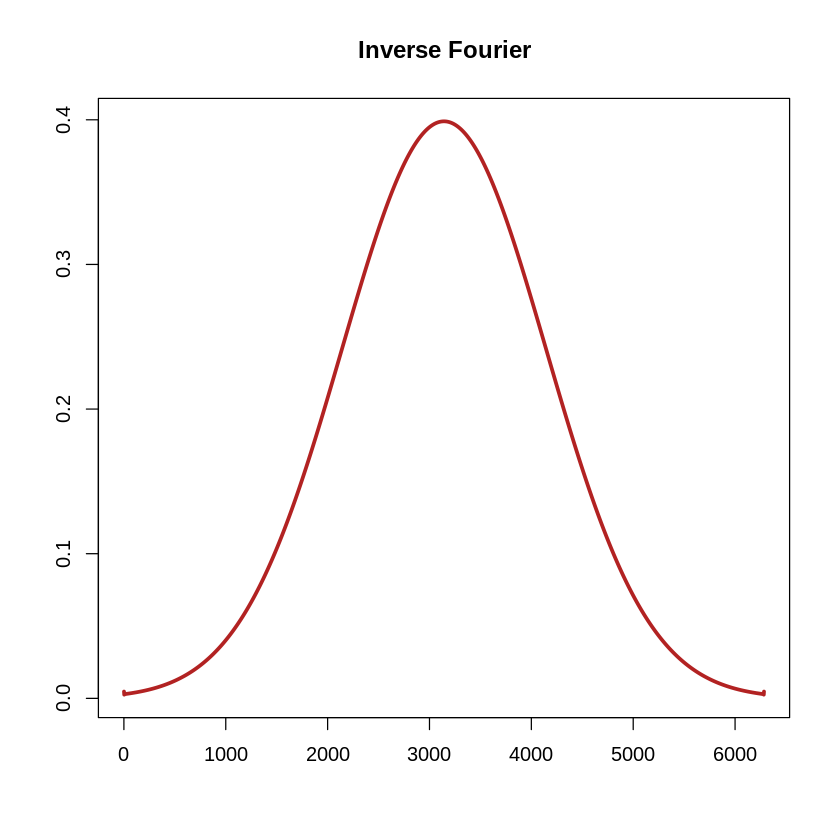

In [8]:
mat <- matrix(0,2*length(N),length(x)) # Empty 2P x P matrix to collect contribution for each harmonic value.
for(i in seq(along=N)){
  mat[i,]   <- cosines[i] * cos(2*pi/P * i * x)         # Multiplying each cosine harmonic basis component by its coefficient found above.
  mat[i+length(N),] <- sines[i] * sin(2*pi/P * i * x)         # Same for sine components.
}
inv.joseph <- rep(azero/2, length(x)) + colSums(mat)
plot(inv.joseph, type='l', col='firebrick', lwd=3, xlab='', ylab='', main='Inverse Fourier')